# Overlap

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network
from connectivity import designed_matrix_sequences
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence

In [2]:
N = 15

dt = 0.0005
tau_m = 0.010
tau_z = 0.100
tau_a = 0.500

I = 0
G = 100.0
threshold = 0.5

self_excitation = 3.0
inhbition = 30.0
transition = 0.4331
transition = 2.0

sequences = [[0, 1, 2, 12, 13, 3, 4], [6, 7, 8, 12, 13, 9, 10]]
w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, 
                              transition=transition, inhbition=inhbition)

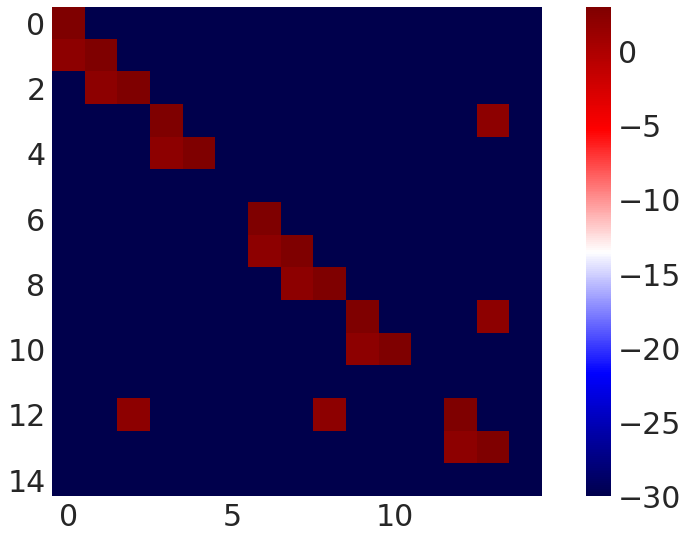

In [3]:
plt.imshow(w, cmap='seismic')
plt.colorbar()
plt.grid()

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


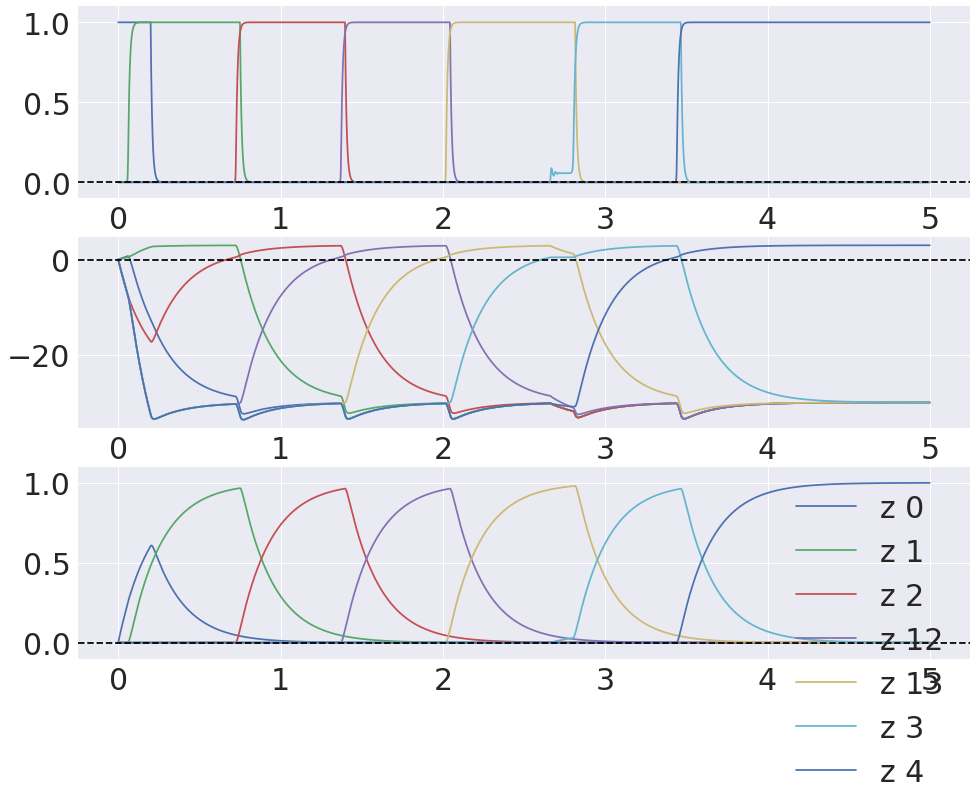

In [4]:
sequence_to_recall = sequences[0]
I_cue = sequence_to_recall[0]

T = 5.0
T_cue = 0.200

tau_m = 0.010
tau_z = 0.200

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

time = np.arange(0, T, dt)


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = sequence_to_recall
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
# ax1.legend();

ax1.set_ylim([-0.1, 1.1])
# ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
# ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


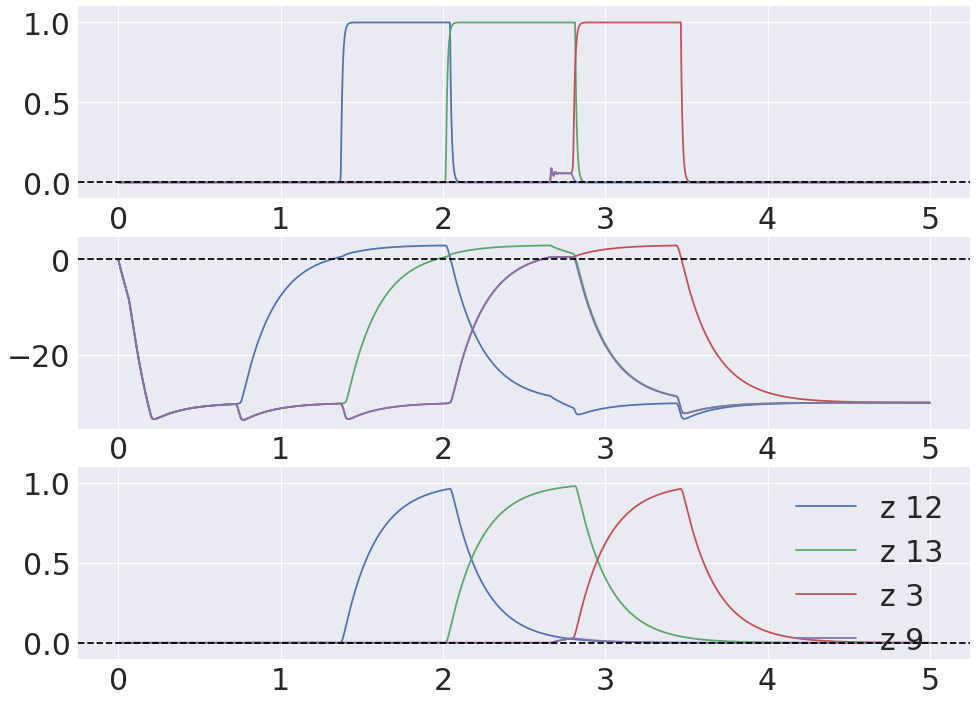

In [5]:
sequence_to_recall = sequences[0]
I_cue = sequence_to_recall[0]

T = 5.0
T_cue = 0.200


dt = 0.0005
tau_m = 0.010
tau_z = 0.200
tau_a = 0.500

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

time = np.arange(0, T, dt)


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [12, 13, 3, 9]
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
# ax1.legend();

ax1.set_ylim([-0.1, 1.1])
# ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
# ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

## Longer disambiguation

In [6]:
N = 20

dt = 0.0005
tau_m = 0.010
tau_z = 0.100
tau_a = 0.500

I = 0
G = 100.0
threshold = 0.5

self_excitation = 3.0
inhbition = 30.0
transition = 0.4331
transition = 2.0

sequences = [[0, 1, 2, 12, 13, 14, 15, 3, 4], [6, 7, 8, 12, 13, 14, 15, 9, 10]]
w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, 
                              transition=transition, inhbition=inhbition)

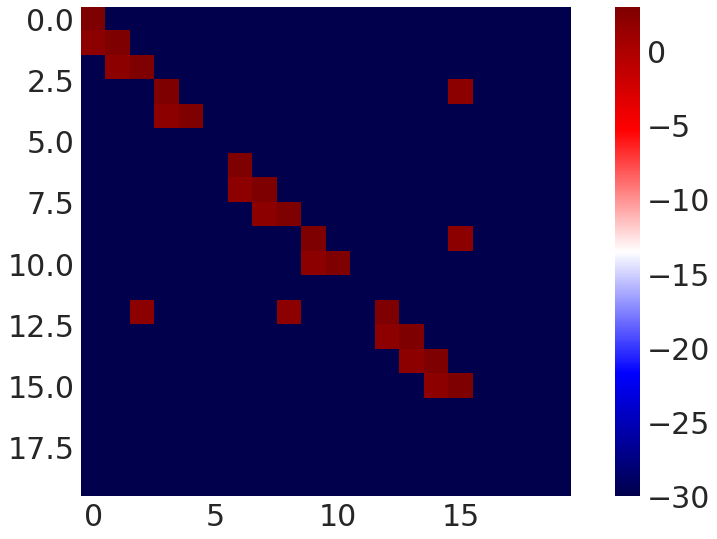

In [7]:
plt.imshow(w, cmap='seismic')
plt.colorbar()
plt.grid()

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


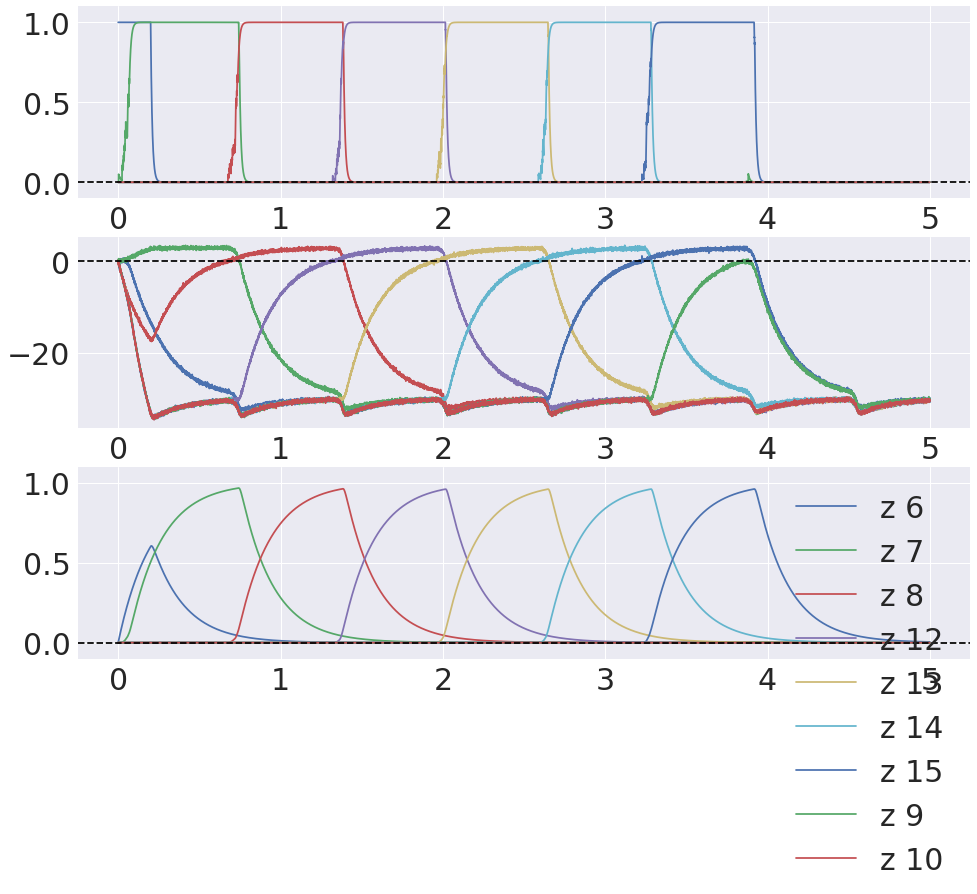

In [17]:
sequence_to_recall = sequences[1]
I_cue = sequence_to_recall[0]

T = 5.0
T_cue = 0.200

tau_m = 0.010
tau_z = 0.200
sigma = 0.2

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue, sigma=sigma)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

time = np.arange(0, T, dt)


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = sequence_to_recall
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
# ax1.legend();

ax1.set_ylim([-0.1, 1.1])
# ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
# ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

We see that the noise destroys the correct recall. Try setting the noise to zero to see that the system disambiguates perfectly. 

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


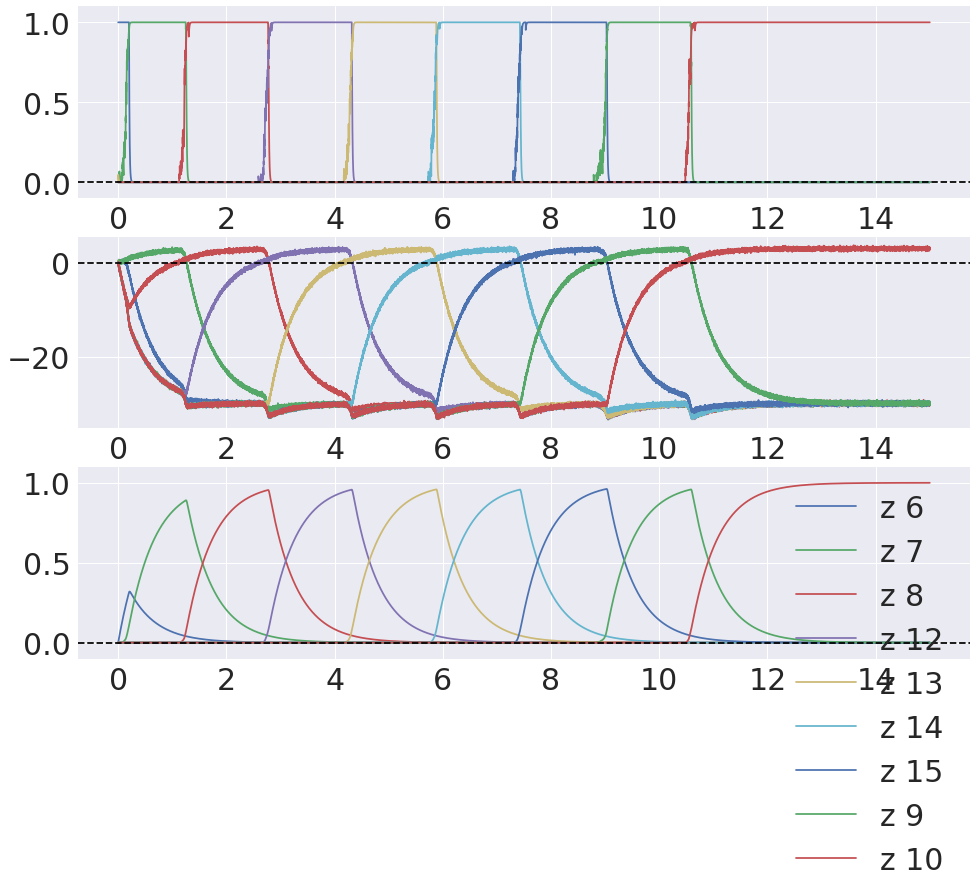

In [20]:
sequence_to_recall = sequences[1]
I_cue = sequence_to_recall[0]

T = 15.0
T_cue = 0.200

tau_m = 0.010
tau_z = 0.500
sigma = 0.2

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue, sigma=sigma)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

time = np.arange(0, T, dt)


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = sequence_to_recall
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
# ax1.legend();

ax1.set_ylim([-0.1, 1.1])
# ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
# ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();